비지도학습

k평균 알고리즘
- 유클리드 거리를 통한 유사성 측정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/14%EC%A3%BC%EC%B0%A8/data_clustering.txt'

x = np.loadtxt(filepath, delimiter=',')
x[:3]

array([[2.08, 1.05],
       [2.05, 7.7 ],
       [4.53, 5.49]])

In [4]:
nnum_cluster = 5

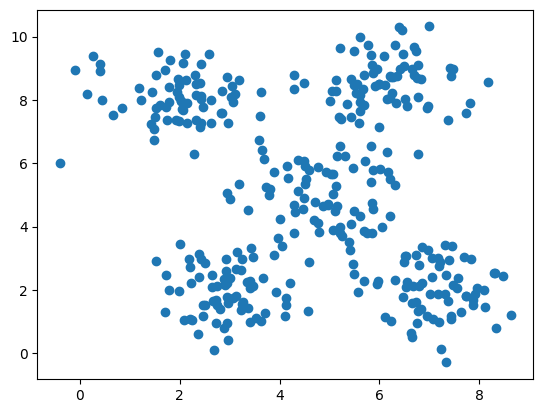

In [5]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [6]:
kmeans = KMeans(n_clusters=nnum_cluster)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [8]:
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

In [13]:
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
output

array([1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       3, 3, 4, 4, 4, 4, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 4, 4, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0], dtype=int32)

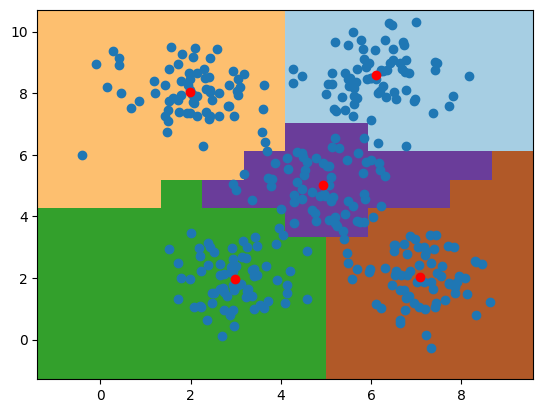

In [17]:
output = output.reshape(x_vals.shape)
plt.imshow(output, interpolation='nearest', extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:,1])

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='red')

plt.show()

평균이동 알고리즘으로 군집수 추정(예측)
- 기본데이터가 표준 확률 분포를 따른다고 가정 - 모수알고리즘
- 비모수 알고리즘
- 객체탐지나 실시간 데이터 분석 같은 분야에 적용

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [20]:
x = np.loadtxt(filepath, delimiter=',')
x[:3]

array([[2.08, 1.05],
       [2.05, 7.7 ],
       [4.53, 5.49]])

In [21]:
bandwidth_x = estimate_bandwidth(x,quantile=0.1, n_samples=len(x))

In [22]:
meanshift_model = MeanShift(bandwidth=bandwidth_x, bin_seeding=True)
meanshift_model.fit(x)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True)

In [23]:
cluster_centers = meanshift_model.cluster_centers_
cluster_centers

array([[2.95568966, 1.95775862],
       [7.20690909, 2.20836364],
       [2.17603774, 8.03283019],
       [5.97960784, 8.39078431],
       [4.99466667, 4.65844444]])

In [24]:
labels = meanshift_model.labels_
labels

array([0, 2, 4, 1, 3, 0, 2, 4, 4, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2,
       4, 0, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1,
       3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0,
       2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 3, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4,
       1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3,
       0, 2, 4, 1, 3, 0, 2, 2, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2,
       4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1,
       3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0,
       2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 3,
       1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3,
       0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 2, 1, 3, 4, 2, 4, 1, 3, 0, 2,
       4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1,
       3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 3, 4, 1, 3, 0, 2, 4, 1, 3, 0,
       2, 4, 1, 3, 0, 2, 4, 1, 3, 0, 2, 4, 1, 3, 0,

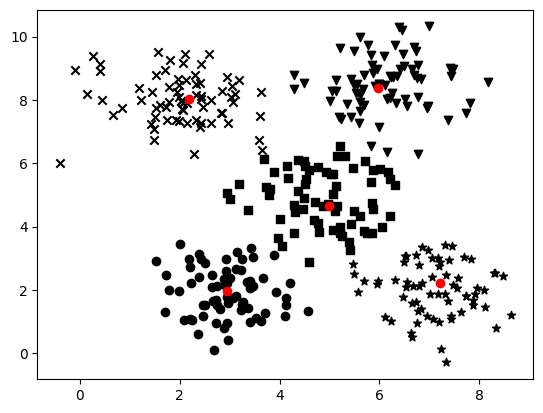

In [27]:
markers = 'o*xvs'
for i, mark in zip(range(len(labels)), markers):
  plt.scatter(x[labels == i, 0], x[labels == i, 1], marker=mark, color='black')
  cluster_center = cluster_centers[i]
  plt.scatter(cluster_center[0], cluster_center[1], marker='o', color='red')

클러스터의 품질 평가는 실루엣 점수로 평가
- 데이터 포인트와 자체 클러스터의 유사성을 다른 클러스터와 비교해서 측정하는 지표
- p : 데이터포인트가 속하지 않은 가장 가까운 클러스터의 포인트까지의 평균 거리
- q : 자체 클러스터의 모든 포인트에 대한 평균 거리(클러스터 내부)
- 실루엣점수: (p - q) / max(p,q)
- 1에 가까우면 잘 클러스터링
- -1에 가까우면 분류에 사용되는 변수가 잡음이 많고 신호를 많이 포함하지 않는다

In [28]:
from sklearn import metrics

In [29]:
x = np.loadtxt(filepath, delimiter=',')
scores = []
values = np.arange(2, 10)

In [31]:
for num_cluster in values:
  kmeans = KMeans(n_clusters= num_cluster, n_init=10)
  kmeans.fit(x)
  score = metrics.silhouette_score(x,kmeans.labels_, sample_size=len(x))
  print(f"number of cluster = {num_cluster}, silhouette_score: {score}")
  scores.append(score)

number of cluster = 2, silhouette_score: 0.4912185214568004
number of cluster = 3, silhouette_score: 0.49290567446017064
number of cluster = 4, silhouette_score: 0.5139269440580392
number of cluster = 5, silhouette_score: 0.5906519837897815
number of cluster = 6, silhouette_score: 0.5274764775436476
number of cluster = 7, silhouette_score: 0.4893304476235197
number of cluster = 8, silhouette_score: 0.43462936020957194
number of cluster = 9, silhouette_score: 0.4284029706828132


In [32]:
max(scores), np.argmax(scores)

(0.5906519837897815, 3)

가우시안 혼합모델(GMM)
- 혼합모델의 종류가 가우시안 모델
- 혼합모델: 데이터가 여러유형 오소분포에 의해 처리된다고 가정하는 확률 밀도 모델유형
- 이때 분포가 가우시안 모델(정규분포와 유사)
- 미국에 모든 사람의 쇼핑습관을 모델링
 - 대륙전체를 모델링 -> 각 대륙별 단일 모델 -> 쇼핑패턴은 나라마다 다르다 -> 각 나라별 쇼핑 방식 행동
 - 혼합모델 : 개별국가의 쇼핑습관을 모델링, 모두 혼합

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import datasets

In [35]:
iris = datasets.load_iris()
x,y = datasets.load_iris(return_X_y=True)

In [37]:
skf = StratifiedKFold(n_splits=5)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [38]:
num_classes = len(np.unique(y_train))
classifier = GaussianMixture(n_components=num_classes)

In [39]:
classifier_means = np.array([x_train[y_train == i].mean(axis=0) for i in range(num_classes)])
classifier_means

array([[5.02051282, 3.4025641 , 1.46153846, 0.24102564],
       [5.88648649, 2.76216216, 4.21621622, 1.32432432],
       [6.63863636, 2.98863636, 5.56590909, 2.03181818]])

In [40]:
classifier.fit(x_train)

GaussianMixture(n_components=3)

In [41]:
y_test_pred = classifier.predict(x_test)
sum(y_test_pred == y_test)

13

In [42]:
len(x_test), len(y_test_pred)

(30, 30)